<a href="https://colab.research.google.com/github/Rohith616/Client-Project-1/blob/main/H2O_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h2o -qq

In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/preprocessed_data.csv')

In [ ]:
data['event'].fillna("no event", inplace = True)
data['holiday'].fillna("休日なし", inplace = True)

In [ ]:
data['ds']=pd.to_datetime(data['ds'] )

In [ ]:
df = data.select_dtypes(include="object")
df = df.drop(["target_address"], axis=1)
for cols in df:
  dummies = pd.get_dummies(df[cols], drop_first=True)
  df = pd.concat([df, dummies], axis="columns")
data = pd.concat([data, df], axis="columns")
df = data.select_dtypes(include=["object"])
data=data.drop(df.columns,axis=1)

In [ ]:
data

,Unnamed: 0,ds,target_id,y,reg_wind,reg_r,temp_max,temp_min,event2,event3,no event,cat_r_1,みどりの日,休日なし,体育の日,元日,勤労感謝の日,国民の休日,天皇の即位の日,天皇誕生日,山の日,建国記念の日,憲法記念日,成人の日,振替休日,敬老の日,文化の日,春分の日,昭和の日,海の日,秋分の日,rain,snow,sunny
0,0,2015-01-01,0,89.058108,4.4,17.856631,8.2,0.7,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2015-01-02,0,88.638431,2.1,-2.435871,7.9,-2.2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,2015-01-03,0,80.884749,3.0,15.382444,8.9,-1.1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,2015-01-04,0,89.288376,1.3,11.864588,9.3,-0.4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2015-01-05,0,86.867064,2.4,-14.973754,12.9,1.3,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,1748,2019-10-15,1,156.960567,2.8,2.630001,23.1,14.6,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3502,1749,2019-10-16,1,130.886110,2.2,23.602167,22.4,12.8,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3503,1750,2019-10-17,1,137.061111,1.8,18.308426,23.7,14.3,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3504,1751,2019-10-18,1,139.740341,2.5,2.687561,24.0,18.4,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
'''data.reset_index(drop=True,inplace=True)
train = data.loc[:int(data.shape[0]*0.8),:]
test = data.loc[int(data.shape[0]*0.8):,:]'''

'data.reset_index(drop=True,inplace=True)\ntrain = data.loc[:int(data.shape[0]*0.8),:]\ntest = data.loc[int(data.shape[0]*0.8):,:]'

In [ ]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(data,test_size=0.25)

In [ ]:
train.shape
test.shape

(877, 34)

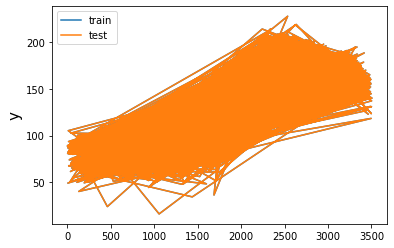

In [ ]:
plt.plot(train.index,train['y'])
plt.plot(train.index,train['y'])
plt.ylabel('y',fontsize=15)
plt.legend(['train','test'])
plt.show()

In [ ]:
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,15 mins 44 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_sf7c3x
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.999 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
hf_train = h2o.H2OFrame(train)
hf_test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
y = 'y'
X = hf_train.columns
X.remove(y)

In [ ]:
aml = H2OAutoML(max_runtime_secs = 600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_2_20220221_75141

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 48.815088687439236
RMSE: 6.9867795648237845
MAE: 5.247098585758952
RMSLE: 0.07630279768898983
R^2: 0.9788376368673409
Mean Residual Deviance: 48.815088687439236
Null degrees of freedom: 2628
Residual degrees of freedom: 2619
Null deviance: 6064297.609619095
Residual deviance: 128334.86815927774
AIC: 17704.434546571232

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 79.40439251301706
RMSE: 8.910914235532573
MAE: 6.789124138699116
RMSLE: 0.09614801659720965
R^2: 0.9655765331197461
Mean Residual Deviance: 79.40439251301706
Null degrees of freedom: 2628
Residual degrees of freedom: 2620
Null deviance: 6066854.455114357


In [ ]:
lb = aml.leaderboard
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_4_AutoML_1_20220221_73657,164.547,12.8276,164.547,10.4249,0.0772728
StackedEnsemble_AllModels_3_AutoML_1_20220221_73657,164.547,12.8276,164.547,10.4249,0.0772728
StackedEnsemble_BestOfFamily_4_AutoML_1_20220221_73657,166.178,12.891,166.178,10.4907,0.0775978
GBM_grid_1_AutoML_1_20220221_73657_model_29,168.651,12.9866,168.651,10.5776,0.0779616
XGBoost_grid_1_AutoML_1_20220221_73657_model_27,176.98,13.3034,176.98,11.0462,0.0798654
XGBoost_grid_1_AutoML_1_20220221_73657_model_40,181.862,13.4856,181.862,10.4115,0.0819447
XGBoost_grid_1_AutoML_1_20220221_73657_model_30,185.011,13.6019,185.011,11.0012,0.0818352
GBM_grid_1_AutoML_1_20220221_73657_model_22,187.195,13.6819,187.195,11.3638,0.081716
GBM_grid_1_AutoML_1_20220221_73657_model_6,188.107,13.7152,188.107,11.4834,0.0818377
XGBoost_grid_1_AutoML_1_20220221_73657_model_28,188.786,13.7399,188.786,11.485,0.0816585


In [ ]:
best_model = aml.leader

In [ ]:
hf_test_predict = best_model.predict(hf_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
df_results = pd.DataFrame()
df_results['True_value'] = test['y'].reset_index(drop=True)
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True)
df_results

,True_value,predictions
0,199.191751,197.906951
1,164.133908,163.825216
2,180.841634,174.083676
3,188.799793,176.500356
4,186.205025,174.197416
...,...,...
697,156.960567,173.514973
698,130.886110,169.565635
699,137.061111,162.198837
700,139.740341,163.491234
